Aim:
To predict the sales Price of a House using 79 Independent variables describing feature of residential home.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\jhans\OneDrive\Desktop\rani\datasets\kaggle housing regression"

C:\Users\jhans\OneDrive\Desktop\rani\datasets\kaggle housing regression


In [3]:
#load Data
housetrain=pd.read_csv('train.csv')

In [4]:
housetest=pd.read_csv('test.csv')

In [5]:
housetrain.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
housetest.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
# check the shape of the data
print(housetrain.shape)
print(housetest.shape)

(1460, 81)
(1459, 80)


In [8]:
housetrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
housetest.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 Exploratory Data Analysis
 

In [10]:
housetrain.describe() #  describe the data and its structure

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:ylabel='Frequency'>

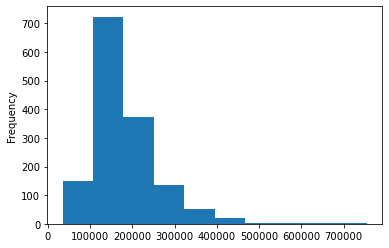

In [11]:
housetrain.SalePrice.plot(kind='hist')

<AxesSubplot:>

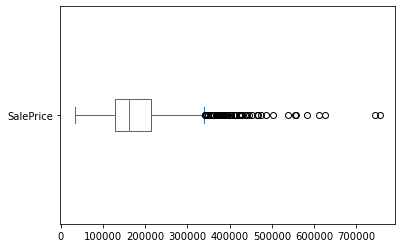

In [12]:
housetrain.SalePrice.plot(kind='box',vert=False)
# there are outliers and positive skewness in dependent variable.
# logarthmic Transform 

<AxesSubplot:>

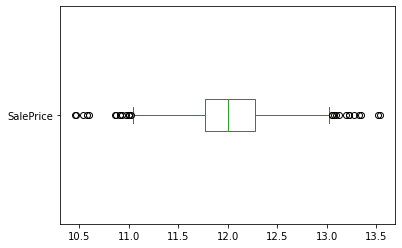

In [13]:
np.log(housetrain.SalePrice).plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

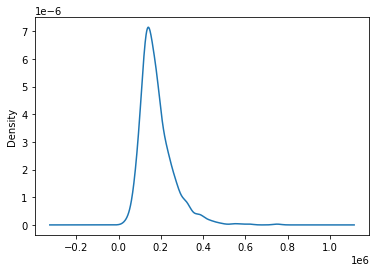

In [14]:
housetrain.SalePrice.plot(kind='density')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

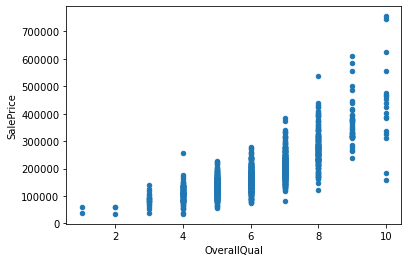

In [15]:
housetrain.plot(x='OverallQual',y='SalePrice',kind='scatter')
#We can observe that average Saleprice increasing with the increase in quality of huose.

Data Preprocessing



In [16]:
#check for missing values in train data
pd.set_option('display.max_rows',90)
housetrain.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [17]:
# check for missing values in test data
pd.set_option('display.max_rows',90)
housetest.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageQual         78
GarageFinish       78
GarageCond         78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
KitchenQual         1
TotalBsmtSF         1
Exterior2nd         1
GarageCars          1
Exterior1st         1
GarageArea          1
SaleType            1
MiscVal             0
BedroomAbvGr        0
KitchenAbvGr        0
YrSold              0
TotRmsAbvGrd        0
MoSold              0
Fireplaces          0
PoolArea            0
HalfBath            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchS

In [18]:
# Combine dataframes for preprocessing
housetest['SalePrice']='test'# Add SalePrice variable to test data

In [19]:
# Since there are missing values in both Train and Test Set Im combining both the Datasets
# Row wise concatenation
combinedf=pd.concat([housetrain,housetest],axis=0)

In [20]:
combinedf.shape

(2919, 81)

In [21]:
# splitig the data based on datatypes to clean the data

In [22]:
# Split data based on datatype
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [23]:
print(numericcols.shape)
print(objectcols.shape)

(2919, 37)
(2919, 44)


In [24]:
numericcols.columns
# Identify those columns that are in numeric data but are not numeric in nature 
# or that can be considered categorical columns.

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [25]:
categorycols=numericcols[['MSSubClass','OverallQual','OverallCond', 
                          'YearBuilt', 'YearRemodAdd','GarageYrBlt',
                         'MoSold', 'YrSold']]
#All are in date-linked format, with the exception of overallcond and overallqual,
#which are rating scales 1-10. 

In [26]:
numericcols=numericcols.drop(['MSSubClass','OverallQual','OverallCond', 
                          'YearBuilt', 'YearRemodAdd','GarageYrBlt',
                         'MoSold', 'YrSold'],axis=1)
# Dropping the categorical columns that are present in the numericcols data

In [27]:
print(objectcols.shape)
print(numericcols.shape)
print(categorycols.shape)

(2919, 44)
(2919, 29)
(2919, 8)


In [28]:
import seaborn as sns

<AxesSubplot:>

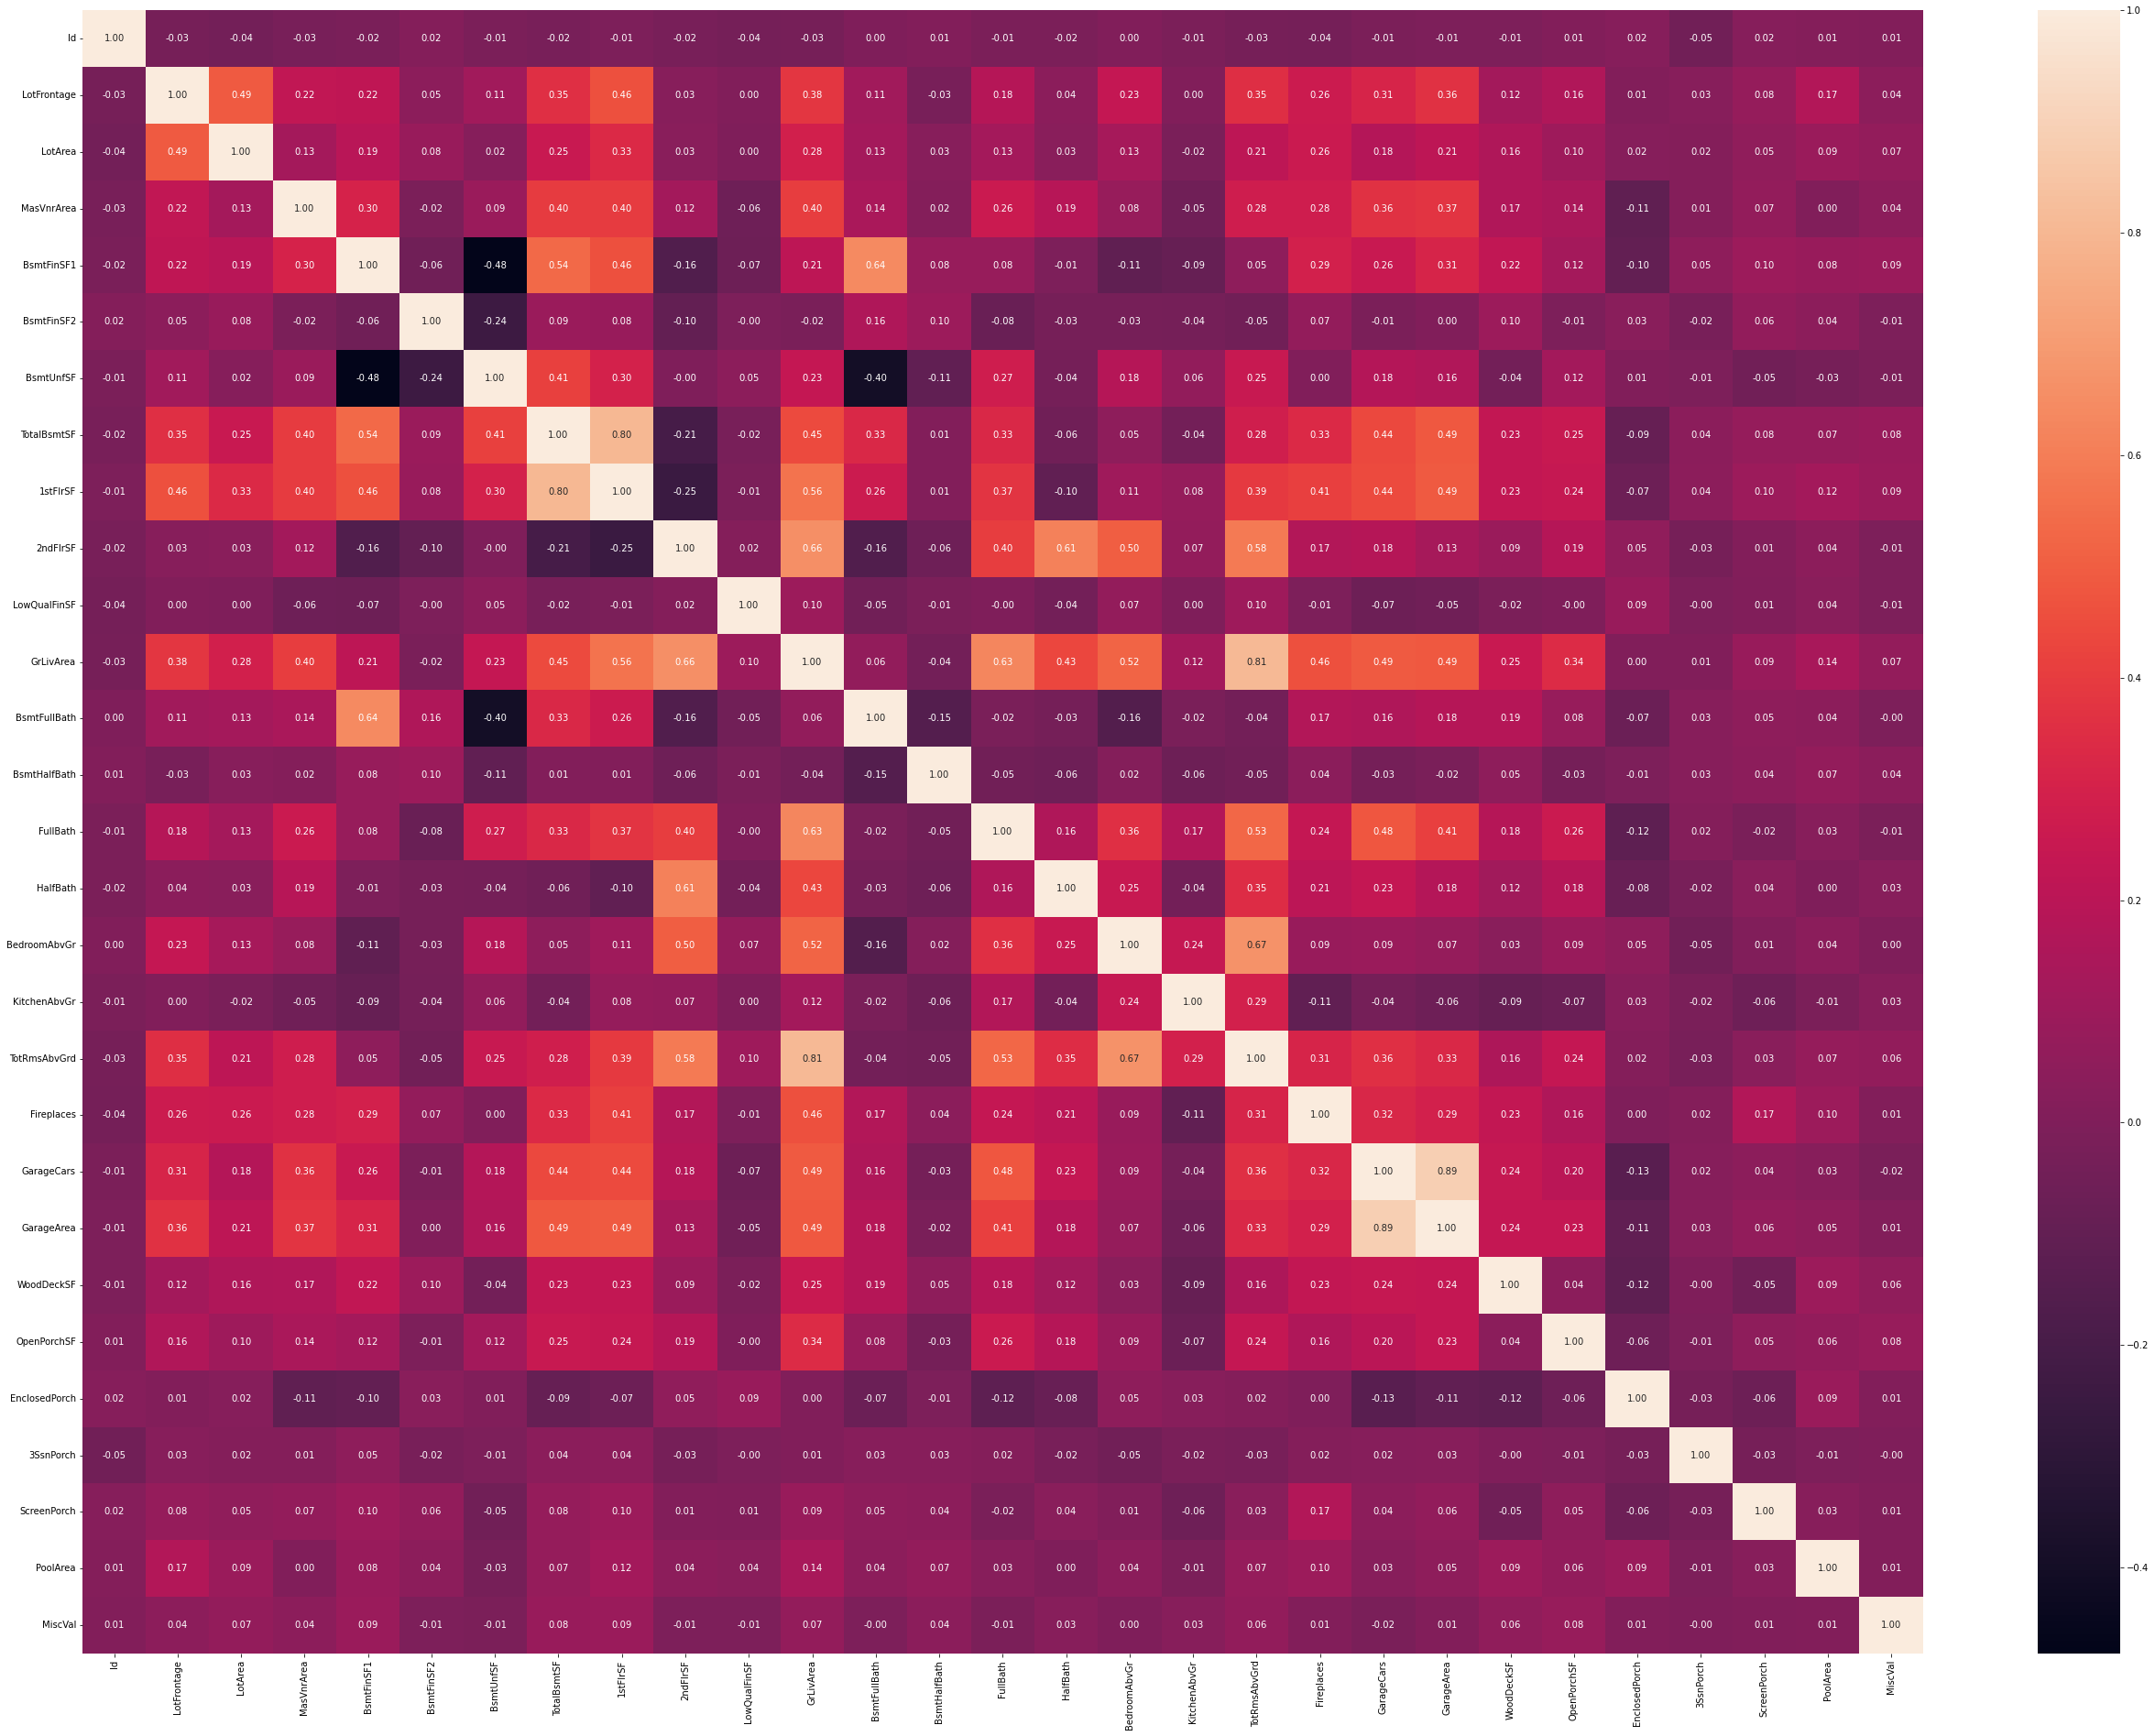

In [29]:
plt.figure(figsize = (45,33))
sns.heatmap(numericcols.corr(),annot=True,fmt = '.2f')

In [30]:
objectcols.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
RoofStyle           0
Neighborhood        0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
LandSlope           0
Condition1          0
HouseStyle          0
Condition2          0
Foundation          0
RoofMatl            0
Street              0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
SalePrice           0
dtype: int64

In [31]:
# Not every house will have these features hence assumed as Not
# Available and impute with word 'Not Available'
NotAvail=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
for col in NotAvail:
    objectcols[col]=objectcols[col].fillna('NotAvailable')

In [32]:
# Garage Columns
garagecols=['GarageCond','GarageQual','GarageFinish','GarageType']
for col in garagecols:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64
TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64
Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64
Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64


In [33]:
bsmtcols=['BsmtCond','BsmtExposure','BsmtQual','BsmtFinType1',
         'BsmtFinType2']
for col in bsmtcols:
    freq=objectcols[col].value_counts(dropna=False)
    print(freq)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64
No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64
TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


Missing Value Imputation: Strategy(SimpleImputer)

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.



In [34]:
from sklearn.impute import SimpleImputer

In [35]:
impute=SimpleImputer(strategy='most_frequent')

In [36]:
objectcolsimp=impute.fit_transform(objectcols)

In [37]:
objectcolsimp=pd.DataFrame(objectcolsimp,columns=objectcols.columns)

In [38]:
categorycols.isnull().sum().sort_values(ascending=False)

GarageYrBlt     159
MSSubClass        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

In [39]:
categorycolsimp=impute.fit_transform(categorycols)

In [40]:
categorycolsimp=pd.DataFrame(categorycolsimp,
                             columns=categorycols.columns)

In [41]:
numericcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
GarageCars         1
GarageArea         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
WoodDeckSF         0
Id                 0
OpenPorchSF        0
EnclosedPorch      0
Fireplaces         0
ScreenPorch        0
PoolArea           0
3SsnPorch          0
FullBath           0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
LotArea            0
MiscVal            0
dtype: int64

In [42]:
medianimpute=SimpleImputer(strategy='median')

In [43]:
numericcolsimp=medianimpute.fit_transform(numericcols)

In [44]:
numericcolsimp=pd.DataFrame(numericcolsimp,
                            columns=numericcols.columns)

In [45]:
numericcolsimp.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

 Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
numericcolsimp['SalePrice']=objectcolsimp.SalePrice
#salesprice is a numeric variable adding to the numericcols.

In [49]:
objectcolsimp=objectcolsimp.drop('SalePrice',axis=1)
#dropping salesprice from objectcols

In [50]:
objectcolsdummy=objectcolsimp.apply(le.fit_transform)

In [51]:
categorycolsdummy=categorycolsimp.apply(le.fit_transform)

In [52]:
# Combine the cleaned data into one data frame in column-wise concatenation. 
combinedf_clean=pd.concat([numericcolsimp,objectcolsdummy,
                          categorycolsdummy],axis=1)

In [53]:
# spliting the data as train and test for model building
housetraindf=combinedf_clean[combinedf_clean.SalePrice!='test']
housetestdf=combinedf_clean[combinedf_clean.SalePrice=='test']

In [54]:
housetestdf=housetestdf.drop('SalePrice',axis=1)
#Dropping the dependent variable "sales price" from the test data

# Hypotesis Testing


In [55]:
housetraindf.SalePrice.groupby(housetraindf.CentralAir).mean()

CentralAir
0    105264.073684
1    186186.709890
Name: SalePrice, dtype: float64

In [56]:
centralairyes=housetraindf[housetraindf.CentralAir==1]
centralairno=housetraindf[housetraindf.CentralAir==0]

In [57]:
from scipy.stats import ttest_ind
# Since there are exactly 2 levels in Categorical varaible -
# 2 Sample Independent t test

In [58]:
ttest_ind(centralairyes.SalePrice,centralairno.SalePrice,
         equal_var=False)
# Since pvalue=2.2808143881868503e-37 is less than 0.05, Reject Null
# Null - There is no significant difference in  SalePrice of CentralAir
# Alt - There is significant difference in  SalePrice of CentralAir

Ttest_indResult(statistic=17.267772563668995, pvalue=2.2808143881868503e-37)

In [59]:
housetraindf.SalePrice.groupby(housetraindf.KitchenQual).mean()

KitchenQual
0    328554.670000
1    105565.205128
2    212116.023891
3    139962.511565
Name: SalePrice, dtype: float64

In [60]:
EX=housetraindf[housetraindf.KitchenQual==0]
FA=housetraindf[housetraindf.KitchenQual==1]
GD=housetraindf[housetraindf.KitchenQual==2]
TA=housetraindf[housetraindf.KitchenQual==2]
# EX-Excellent,Gd-Good,TA-Typical/Average,Fa-Fair

In [61]:
# Since there are more than 2 levels in Categorical Variable - Anova
# Single Factor
from scipy.stats import f_oneway

In [62]:
f_oneway(EX.SalePrice,FA.SalePrice,
        GD.SalePrice,TA.SalePrice)
# Since pvalue=1.8517417341764317e-69 is less than 0.05, Reject Null
# Null - There is no significant difference in  SalePrice of KitchenQual
# Alt - There is significant difference in  SalePrice of KitchenQual

F_onewayResult(statistic=121.59706324824904, pvalue=1.8517417341764317e-69)

In [63]:
pd.crosstab(housetraindf.GarageQual,housetraindf.GarageType)

GarageType,0,1,2,3,4,5
GarageQual,,,,,,
0,0,0,0,0,0,3
1,1,6,2,0,2,37
2,0,9,0,1,0,4
3,0,0,0,0,0,3
4,5,936,17,87,7,340


In [64]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(housetraindf.GarageQual,housetraindf.GarageType))
# Since p-value=8.351518223954746e-14 is less than 0.05, Reject Null

(106.54237980676595,
 8.351518223954746e-14,
 20,
 array([[1.23287671e-02, 1.95410959e+00, 3.90410959e-02, 1.80821918e-01,
         1.84931507e-02, 7.95205479e-01],
        [1.97260274e-01, 3.12657534e+01, 6.24657534e-01, 2.89315068e+00,
         2.95890411e-01, 1.27232877e+01],
        [5.75342466e-02, 9.11917808e+00, 1.82191781e-01, 8.43835616e-01,
         8.63013699e-02, 3.71095890e+00],
        [1.23287671e-02, 1.95410959e+00, 3.90410959e-02, 1.80821918e-01,
         1.84931507e-02, 7.95205479e-01],
        [5.72054795e+00, 9.06706849e+02, 1.81150685e+01, 8.39013699e+01,
         8.58082192e+00, 3.68975342e+02]]))

In [65]:
y=housetraindf.SalePrice # y is a dependent variable
X=housetraindf.drop(['Id','SalePrice'],axis=1)# X is the independent variables

In [66]:
y.dtype #the y variable showing the object dtype because of adding "test" to that variable.

dtype('O')

In [67]:
# convert the dtypes to their original datatype, float.
y=y.astype(float) 

# Model Building and Idealogy :

The dependent variable is numerical. Let's build regression models.
 
 Multiple Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
reg=LinearRegression()

In [70]:
regmodel=reg.fit(X,y)

In [71]:
regmodel.score(X,y) # R Square

0.8543679251637534

In [72]:
housetestdf=housetestdf.drop('Id',axis=1)
#drop the Id variable from test data

In [73]:
# Predict model
regpredict=regmodel.predict(X)

In [74]:
regresidual=y-regpredict # Residual

In [75]:
np.sqrt(np.mean(regresidual**2)) # RMSE

30306.281646516367

In [76]:
# Predict Dependent Variable in test Data
regtest=regmodel.predict(housetestdf)

In [77]:
regtest # Predicted Dependent Variable in Test data

array([106883.58936167, 161945.080434  , 166415.68077194, ...,
       142786.63899032, 112511.59685395, 242448.66608168])

In [78]:
pd.DataFrame(regtest).to_csv("reg.csv")

 Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree=DecisionTreeRegressor()

In [81]:
treemodel=tree.fit(X,y)

In [82]:
treemodel.score(X,y) # R square

1.0

In [83]:
# Predict Dependent Variable in test Data
treepredict=treemodel.predict(housetestdf)

In [84]:
treepredict

array([129000., 157000., 173000., ..., 139000., 108000., 222000.])

In [85]:
pd.DataFrame(treepredict).to_csv("tree.csv")

RandomForest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
RF=RandomForestRegressor(n_estimators=3000)

In [88]:
RFmodel=RF.fit(X,y)

In [89]:
RFmodel.score(X,y) # R square

0.9823401022319043

In [90]:
# Predict Dependent Variable in test Data
RFpredict=RFmodel.predict(housetestdf)

In [91]:
RFpredict

array([126184.36166667, 154822.39833333, 180208.786     , ...,
       151550.59466667, 114761.92433333, 227719.82066667])

In [92]:
pd.DataFrame(RFpredict).to_csv("RF.csv")

Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [94]:
gbm=GradientBoostingRegressor(n_estimators=3000)

In [95]:
gbmmodel=gbm.fit(X,y)

In [96]:
gbmmodel.score(X,y) #R square

0.999961590228345

In [97]:
gbmpre=gbmmodel.predict(X)

In [98]:
gbmresidual=y-gbmpre # Residual

In [99]:
np.sqrt(np.mean(gbmresidual**2))

492.18117542237695

In [100]:
# Predict Dependent Variable in test Data
gbmpredict=gbmmodel.predict(housetestdf)

In [101]:
gbmpredict

array([110725.41301638, 163406.75971818, 191384.51554673, ...,
       169599.77577417, 107492.74834411, 233398.51904229])

In [102]:
pd.DataFrame(gbmpredict).to_csv("gbm.csv")

Model Selection by using grid search technique

grid search technique will evaluate all the possible combination of hyper parameters values, using cross validation.

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = [
    {'learning_rate': [0.01,0.02,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6]
                 },]

gb_reg = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.01, 0.02, 0.04],
                          'max_depth': [4, 6], 'n_estimators': [100, 500, 1000],
                          'subsample': [0.9, 0.5, 0.2, 0.1]}],
             scoring='neg_mean_squared_error')

In [105]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}

In [106]:
gbm_final=grid_search.best_estimator_

In [107]:
gbm_pred=gbm_final.predict(housetestdf)

In [108]:
pd.DataFrame(gbm_pred).to_csv('gbm_pred.csv')

In [109]:
# Regularization techniques
#Lasso,Ridge and Elasticnet regression

In [110]:
from sklearn.linear_model import Lasso

In [111]:
lasso=Lasso(alpha=100,max_iter=100000)

In [112]:
lassomodel=lasso.fit(X,y)

In [113]:
lassomodel.score(X,y)

0.8529138736751585

In [114]:
lassopredict=lassomodel.predict(housetestdf) # Prediction on testdata

In [115]:
pd.DataFrame(lassopredict).to_csv('lasso.csv')

In [116]:
from sklearn.linear_model import Ridge

In [117]:
ridge=Ridge(alpha=100,max_iter=100000)

In [118]:
ridgemodel=ridge.fit(X,y)

In [119]:
ridgemodel.score(X,y)#R square
# There is not much improvement in the model.

0.8482072030009766

In [120]:
from sklearn.linear_model import ElasticNet

In [121]:
e_net=ElasticNet(alpha=100,l1_ratio=0.9,max_iter=100000)

In [122]:
e_net_model=e_net.fit(X,y)

In [123]:
e_net_model.score(X,y)

0.7736887284483227

Conclusion: All the above models of gradient boosting are the final predicted models. 

I entered the predicted test values into the competition at Kaggle House Prices-Advanced Regression Techniques. Of all the models The regression method is gradient boosting with a root mean square error of 0.1315.